# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
import pandas as pd

In [18]:
# Your code here. 

# # initialize list of lists 
# data = [['tom', 10], ['nick', 15], ['juli', 14]] 
  
# # Create the pandas DataFrame 
# df = pd.DataFrame(data, columns = ['Name', 'Age']) 

data = [[17, 10], [51, 1], [27, 5], [21, 9], [36, 4], [48, 2], [19, 9], [26, 6], [54, 0], [30, 3]]

student_data = pd.DataFrame(data, columns = ['Age', 'Tardies'])
student_data.index.name = 'StudentID'
student_data.reset_index(drop=True)
student_data.head()

,Age,Tardies
StudentID,,
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

In [19]:
import seaborn as sns

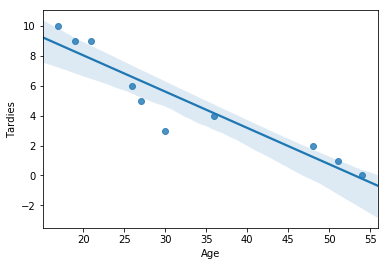

In [20]:
sns.regplot(x="Age", y="Tardies", data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [22]:
# Your response here.
# Tardies decline with age increasing

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [25]:
# Correlation is when the change in one item may result in the change in the another item. On the other hand, covariance is when two items vary together. 

In [23]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [24]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# [Age] = b0 + b1*[Tardies]

In [27]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
X = pd.DataFrame(data= student_data, columns=['Age'])
Y = pd.DataFrame(data= student_data, columns=['Tardies'])
model = lm.fit(X,Y)
lm.intercept_
lm.coef_
predictions  = lm.predict(X)

In [31]:
print(lm.intercept_)
print(lm.coef_)
print(predictions)

[12.88880336]
[[-0.24282077]]
[[ 8.76085026]
 [ 0.50494405]
 [ 6.33264255]
 [ 7.78956717]
 [ 4.14725561]
 [ 1.23340636]
 [ 8.27520872]
 [ 6.57546332]
 [-0.22351827]
 [ 5.60418024]]


Plot your regression model on your scatter plot.

In [34]:
import matplotlib.pyplot as plt

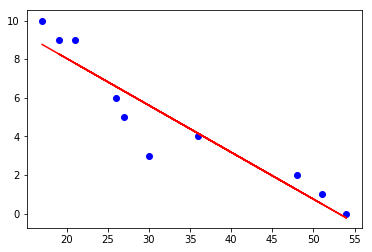

In [38]:
plt.scatter(student_data.Age, student_data.Tardies, color='b')
plt.plot(student_data.Age, predictions, color='r')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [39]:
# Import any libraries you may need & the data

vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

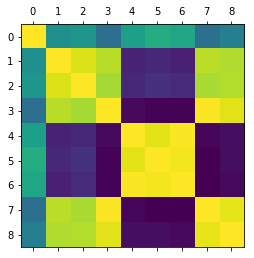

In [40]:
plt.matshow(vehicles.corr())
plt.show()

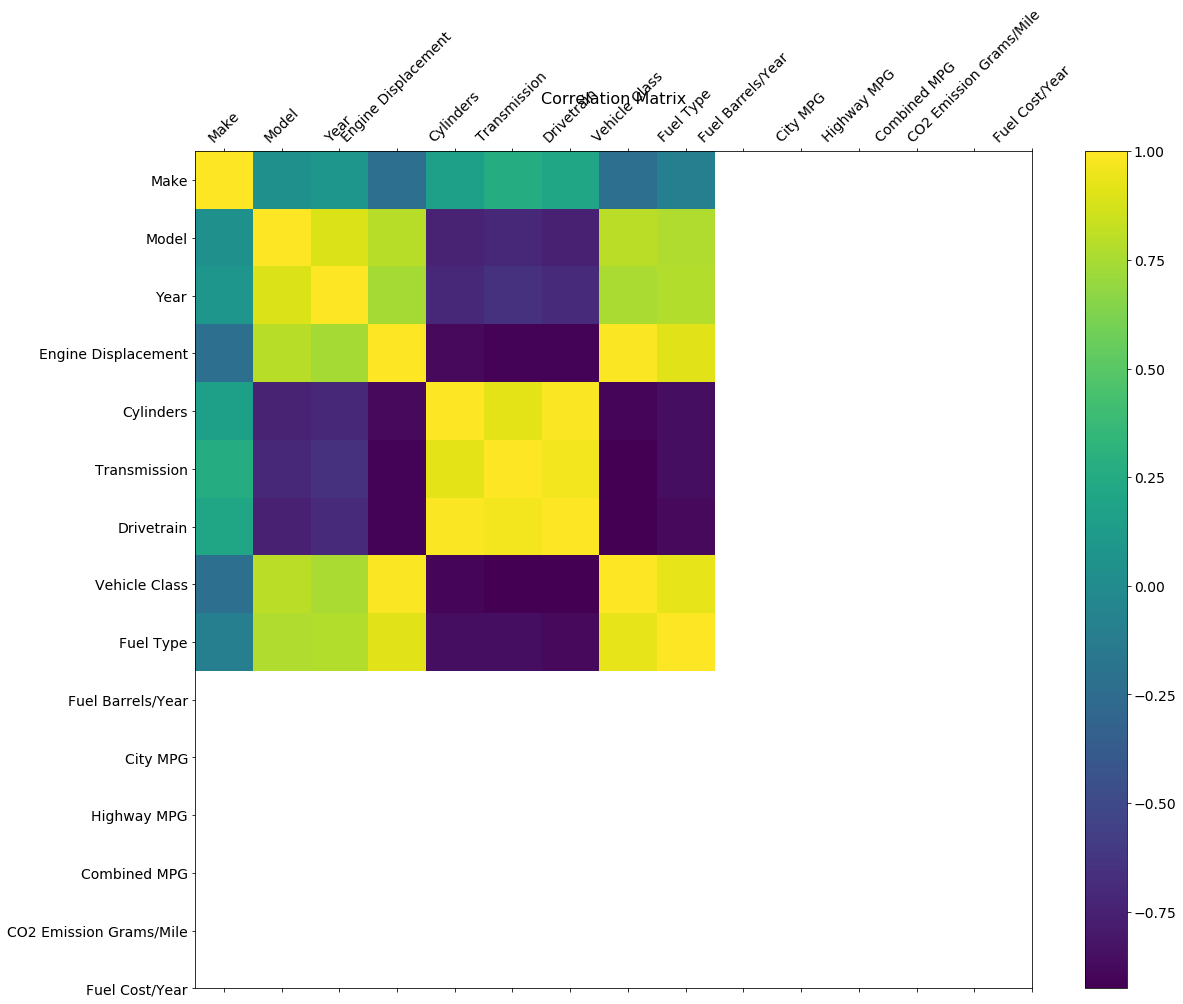

In [43]:
f = plt.figure(figsize=(19, 15))
plt.matshow(vehicles.corr(), fignum=f.number)
plt.xticks(range(vehicles.shape[1]), vehicles.columns, fontsize=14, rotation=45)
plt.yticks(range(vehicles.shape[1]), vehicles.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [70]:
vehicles.corr()['CO2 Emission Grams/Mile']

Year                      -0.222300
Engine Displacement        0.803520
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
City MPG                  -0.894139
Highway MPG               -0.926405
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [57]:
vehicles.isna().sum()

Make                       0
Model                      0
Year                       0
Engine Displacement        0
Cylinders                  0
Transmission               0
Drivetrain                 0
Vehicle Class              0
Fuel Type                  0
Fuel Barrels/Year          0
City MPG                   0
Highway MPG                0
Combined MPG               0
CO2 Emission Grams/Mile    0
Fuel Cost/Year             0
dtype: int64

In [60]:
import numpy as np

In [67]:
vehicles['CO2 Emission Grams/Mile'] = vehicles['CO2 Emission Grams/Mile'].replace(0, np.NaN)
vehicles['Fuel Barrels/Year'] = vehicles['Fuel Barrels/Year'].replace(0, np.NaN)

In [68]:
vehicles.isna().sum()

Make                       0
Model                      0
Year                       0
Engine Displacement        0
Cylinders                  0
Transmission               0
Drivetrain                 0
Vehicle Class              0
Fuel Type                  0
Fuel Barrels/Year          0
City MPG                   0
Highway MPG                0
Combined MPG               0
CO2 Emission Grams/Mile    0
Fuel Cost/Year             0
dtype: int64

In [83]:
from sklearn import linear_model
import numpy as np

lm = linear_model.LinearRegression()
X = pd.DataFrame(data= vehicles, columns=['CO2 Emission Grams/Mile'])
# Y = pd.DataFrame(data= vehicles, columns=['Fuel Barrels/Year'])
Y = pd.DataFrame(data= vehicles, columns=[['Fuel Barrels/Year','Highway MPG', 'Year']])
model = lm.fit(X,Y)
lm.intercept_
lm.coef_
predictions  = lm.predict(X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [95]:
import numpy as np
from sklearn.linear_model import LinearRegression

Y = vehicles[['CO2 Emission Grams/Mile']]
X = vehicles[['Year', 'Cylinders', 'Combined MPG', 'Fuel Cost/Year']]

lm = LinearRegression()
model = lm.fit(X, Y)

print(lm.intercept_)
print(lm.coef_)
predictions = lm.predict(X)

for d,p in zip(Y['CO2 Emission Grams/Mile'], predictions):
    print(d, "->", p[0])

[2775.84540096]
[[-1.1790046   6.20298442 -9.70381129  0.11410475]]
522.7647058823529 -> 519.051694496683
683.6153846153846 -> 638.7357596659895
555.4375 -> 544.6922139833523
683.6153846153846 -> 637.5567550699784
555.4375 -> 606.0873120048986
403.95454545454544 -> 403.8584399184583
370.29166666666674 -> 373.0403421419787
444.35 -> 452.78774413074143
403.95454545454544 -> 402.67943532244726
370.29166666666674 -> 371.8613375459677
444.35 -> 451.6087395347304
403.95454545454544 -> 401.5004307264362
370.29166666666674 -> 370.6823329499566
444.35 -> 450.4297349387193
444.35 -> 488.87943208401566
444.35 -> 487.7004274880046
467.73684210526324 -> 520.722935989977
444.35 -> 486.52142289199355
467.73684210526324 -> 519.543931393966
444.35 -> 485.3424182959825
467.73684210526324 -> 518.3649267979549
444.35 -> 488.00838892724096
423.19047619047615 -> 471.42033544299056
444.35 -> 485.65037973521885
423.19047619047615 -> 470.2413308469795
444.35 -> 490.36639811926307
444.35 -> 489.187393523252
444

444.35 -> 479.7553567551636
444.35 -> 478.5763521591525
355.48 -> 372.00942608770947
386.39130434782606 -> 408.5327614614089
355.48 -> 370.8304214916984
386.39130434782606 -> 407.3537568653978
370.29166666666674 -> 390.76570338114743
355.48 -> 369.65141689568736
370.29166666666674 -> 389.5866987851364
355.48 -> 368.4724122996763
343.0 -> 351.88435881542546
374.0 -> 388.4076941891253
377.0 -> 388.4076941891253
377.0 -> 387.22868959311427
343.0 -> 350.7053542194144
343.0 -> 349.52634962340335
356.0 -> 364.93539851164314
361.0 -> 363.7563939156321
343.0 -> 348.3473450273923
330.0 -> 331.75929154314144
341.8076923076923 -> 355.4213726034586
355.48 -> 369.65141689568736
355.48 -> 368.4724122996763
342.0 -> 351.88435881542546
333.0 -> 335.2963053311746
386.39130434782606 -> 407.3537568653978
370.29166666666674 -> 390.76570338114743
370.29166666666674 -> 389.5866987851364
374.0 -> 388.4076941891253
377.0 -> 388.4076941891253
377.0 -> 387.22868959311427
370.0 -> 386.0496849971032
370.0 -> 384.

288.0 -> 205.13967203202583
299.0 -> 213.66447872703384
288.0 -> 206.31867662803688
288.0 -> 205.13967203202583
299.0 -> 213.66447872703384
444.35 -> 450.4297349387193
423.19047619047615 -> 435.02068605048
444.35 -> 489.187393523252
467.73684210526324 -> 516.0069176059328
423.19047619047615 -> 473.7783446350127
423.19047619047615 -> 465.5253124629353
403.95454545454544 -> 444.4110259774752
423.19047619047615 -> 464.34630786692423
403.95454545454544 -> 443.23202138146416
423.19047619047615 -> 463.1673032709132
403.95454545454544 -> 442.0530167854531
403.95454545454544 -> 440.87401218944206
403.95454545454544 -> 440.87401218944206
403.95454545454544 -> 439.695007593431
403.95454545454544 -> 439.695007593431
341.8076923076923 -> 353.0633634114365
329.1481481481481 -> 337.6543145231967
341.0 -> 351.88435881542546
336.0 -> 351.88435881542546
323.0 -> 335.2963053311746
337.0 -> 350.7053542194144
324.0 -> 334.11730073516355
341.0 -> 349.52634962340335
337.0 -> 348.3473450273923
327.0 -> 332.9

592.4666666666667 -> 600.103316075003
634.7857142857142 -> 631.449073158893
634.7857142857142 -> 686.1434399390764
634.7857142857142 -> 687.3224445350875
493.72222222222223 -> 542.4531453539103
493.72222222222223 -> 541.2741407578992
493.72222222222223 -> 540.0951361618881
522.7647058823529 -> 565.7356556485579
592.4666666666667 -> 643.0076368950754
592.4666666666667 -> 641.8286322990643
592.4666666666667 -> 640.6496277030533
586.0 -> 639.4706231070422
586.0 -> 638.2916185110312
586.0 -> 637.1126139150201
555.4375 -> 623.2621403884614
555.4375 -> 622.0831357924503
555.4375 -> 620.9041311964393
555.4375 -> 624.4411449844724
555.4375 -> 623.2621403884614
555.4375 -> 622.0831357924503
555.4375 -> 620.9041311964393
592.4666666666667 -> 646.5446506831086
592.4666666666667 -> 645.3656460870975
555.4375 -> 610.2402486714045
522.7647058823529 -> 582.2417199927127
592.4666666666667 -> 634.7017635620628
592.4666666666667 -> 633.5227589660517
683.6153846153846 -> 665.3426248176406
683.61538461538

423.19047619047615 -> 427.94665847441365
555.4375 -> 534.6970954977251
555.4375 -> 547.1030643363088
555.4375 -> 533.518090901714
555.4375 -> 545.9240597402977
555.4375 -> 532.339086305703
522.7647058823529 -> 517.9255310616063
555.4375 -> 531.1600817096919
522.7647058823529 -> 516.7465264655953
555.4375 -> 534.6970954977251
592.4666666666667 -> 568.2173508217693
555.4375 -> 533.518090901714
592.4666666666667 -> 567.0383462257582
555.4375 -> 532.339086305703
555.4375 -> 544.7450551442867
555.4375 -> 531.1600817096919
555.4375 -> 543.5660505482756
444.35 -> 463.3987854948414
444.35 -> 462.21978089882987
467.73684210526324 -> 482.1550627882789
467.73684210526324 -> 480.9760581922678
493.72222222222223 -> 509.16437225379514
467.73684210526324 -> 488.0500857683346
467.73684210526324 -> 488.0500857683346
493.72222222222223 -> 554.8062730315592
493.72222222222223 -> 509.16437225379514
442.60869565217394 -> 426.4138902153759
484.7619047619048 -> 475.3431944276599
493.72222222222223 -> 507.985

444.35 -> 453.35082584828024
444.35 -> 453.35082584828024
403.95454545454544 -> 416.8274904745804
522.7647058823529 -> 529.0996541432442
522.7647058823529 -> 529.0996541432442
522.7647058823529 -> 529.0996541432442
522.7647058823529 -> 527.9206495472331
522.7647058823529 -> 527.9206495472331
522.7647058823529 -> 526.741644951222
493.72222222222223 -> 505.627358465762
522.7647058823529 -> 525.5626403552105
493.72222222222223 -> 504.44835386975046
522.7647058823529 -> 524.3836357591995
555.4375 -> 550.0241552458688
555.4375 -> 548.8451506498577
555.4375 -> 548.8451506498577
555.4375 -> 599.0132844288319
522.7647058823529 -> 520.8466219711663
555.4375 -> 597.8342798328208
555.4375 -> 546.4871414578356
555.4375 -> 596.6552752368098
555.4375 -> 544.1291322658135
555.4375 -> 542.9501276698024
555.4375 -> 541.7711230737914
555.4375 -> 540.5921184777803
555.4375 -> 539.4131138817693
522.7647058823529 -> 511.4145852030779
555.4375 -> 537.0551046897472
555.4375 -> 535.8761000937361
555.4375 -> 5

353.0 -> 335.23020592952935
355.48 -> 349.378261081662
355.48 -> 348.19925648565095
355.48 -> 344.6622426976178
403.95454545454544 -> 403.29535820091996
493.72222222222223 -> 513.317308920301
493.72222222222223 -> 513.317308920301
522.7647058823529 -> 533.25259080975
493.72222222222223 -> 556.6012005060429
386.39130434782606 -> 413.2487798454531
370.29166666666674 -> 363.6083053738903
355.48 -> 348.19925648565095
386.39130434782606 -> 412.06977524944205
370.29166666666674 -> 362.42930077787923
355.48 -> 347.0202518896399
370.29166666666674 -> 396.6607263612027
355.48 -> 375.54643987574264
370.29166666666674 -> 395.48172176519165
355.48 -> 374.3674352797316
370.29166666666674 -> 361.2502961818682
355.48 -> 345.84124729362884
386.39130434782606 -> 410.890770653431
341.8076923076923 -> 357.77938179548073
341.8076923076923 -> 329.253193809378
329.1481481481481 -> 313.84414492113865
355.48 -> 373.1884306837205
355.48 -> 373.1884306837205
355.48 -> 343.48323810160673
329.1481481481481 -> 312

740.5833333333335 -> 683.4767048016392
683.6153846153846 -> 645.2467055245174
598.8235294117648 -> 560.7895595826762
636.25 -> 581.9038460681363
592.4666666666667 -> 572.3174463273403
555.4375 -> 551.2031598418798
592.4666666666667 -> 572.3174463273403
555.4375 -> 551.2031598418798
683.6153846153846 -> 644.0677009285064
634.7857142857142 -> 617.2481768458251
634.7857142857142 -> 617.2481768458251
683.6153846153846 -> 644.0677009285064
740.5833333333335 -> 682.2977002056282
683.6153846153846 -> 644.0677009285064
636.25 -> 580.7248414721253
636.25 -> 580.7248414721253
598.8235294117648 -> 558.4315503906541
555.4375 -> 550.0241552458688
592.4666666666667 -> 571.1384417313293
555.4375 -> 550.0241552458688
555.4375 -> 550.0241552458688
634.7857142857142 -> 616.0691722498141
634.7857142857142 -> 616.0691722498141
683.6153846153846 -> 642.8886963324953
740.5833333333335 -> 681.1186956096171
683.6153846153846 -> 642.8886963324953
683.6153846153846 -> 642.8886963324953
636.25 -> 579.54583687611

271.0 -> 216.48404782482157
296.23333333333335 -> 294.73410396467443
253.9142857142857 -> 229.09933471791692
306.44827586206895 -> 308.9641482569027
261.38235294117646 -> 243.32937901014566
317.39285714285717 -> 323.19419254913146
269.3030303030303 -> 251.85418570515367
317.39285714285717 -> 322.0151879531204
269.3030303030303 -> 250.6751811091426
329.1481481481481 -> 338.60324143737125
329.1481481481481 -> 337.4242368413602
592.4666666666667 -> 568.7804325393072
683.6153846153846 -> 640.5306871404732
683.6153846153846 -> 640.5306871404732
592.4666666666667 -> 567.6014279432961
634.7857142857142 -> 612.5321584617809
683.6153846153846 -> 639.3516825444622
636.25 -> 576.008823088081
634.7857142857142 -> 598.9471850271862
683.6153846153846 -> 638.1726779484511
636.25 -> 574.82981849207
740.5833333333335 -> 676.4026772255729
683.6153846153846 -> 639.3516825444622
683.6153846153846 -> 640.5306871404732
740.5833333333335 -> 676.4026772255729
246.86111111111111 -> 207.48730141038504
211.59523

423.19047619047615 -> 455.47735281637415
403.95454545454544 -> 394.4264031503699
467.73684210526324 -> 496.52692119128324
423.19047619047615 -> 414.36168503981935
423.19047619047615 -> 454.2983482203631
403.95454545454544 -> 393.2473985543588
467.73684210526324 -> 495.3479165952722
423.19047619047615 -> 413.1826804438083
423.19047619047615 -> 453.11934362435204
403.95454545454544 -> 392.06839395834777
423.19047619047615 -> 451.940339028341
423.19047619047615 -> 412.00367584779724
403.95454545454544 -> 430.8260525428809
386.39130434782606 -> 375.4803404740969
386.39130434782606 -> 374.30133587808587
423.19047619047615 -> 410.8246712517862
423.19047619047615 -> 410.8246712517862
423.19047619047615 -> 409.64566665577513
467.73684210526324 -> 497.7059257872943
423.19047619047615 -> 415.5406896358304
423.19047619047615 -> 455.47735281637415
403.95454545454544 -> 394.4264031503699
467.73684210526324 -> 496.52692119128324
423.19047619047615 -> 414.36168503981935
423.19047619047615 -> 454.2983

329.1481481481481 -> 340.96125062939336
269.3030303030303 -> 254.21219489717578
329.1481481481481 -> 339.7822460333823
269.3030303030303 -> 253.03319030116472
286.67741935483866 -> 278.1460504804236
403.95454545454544 -> 456.7641536551246
370.29166666666674 -> 420.24081828142425
329.1481481481481 -> 338.60324143737125
286.67741935483866 -> 276.9670458844125
296.23333333333335 -> 292.3760947726523
403.95454545454544 -> 455.5851490591135
355.48 -> 397.94752719995313
329.1481481481481 -> 337.4242368413602
286.67741935483866 -> 275.7880412884015
296.23333333333335 -> 291.19709017664127
403.95454545454544 -> 414.46948128255826
355.48 -> 368.24233461783933
341.8076923076923 -> 351.65428113358803
296.23333333333335 -> 290.01808558062976
317.39285714285717 -> 320.8361833571089
386.39130434782606 -> 432.11285338163
355.48 -> 365.88432542581677
306.44827586206895 -> 304.24812987285804
329.1481481481481 -> 335.06622764933763
386.39130434782606 -> 396.7024232022959
386.39130434782606 -> 396.702423

493.72222222222223 -> 482.0472665455404
467.73684210526324 -> 460.9329800600799
493.72222222222223 -> 482.0472665455404
493.72222222222223 -> 480.86826194952937
493.72222222222223 -> 480.86826194952937
493.72222222222223 -> 479.6892573535183
493.72222222222223 -> 479.6892573535183
493.72222222222223 -> 478.51025275750726
493.72222222222223 -> 478.51025275750726
493.72222222222223 -> 483.2262711415515
493.72222222222223 -> 483.2262711415515
522.7647058823529 -> 504.34055762701155
522.7647058823529 -> 503.1615530310005
493.72222222222223 -> 482.0472665455404
522.7647058823529 -> 503.1615530310005
522.7647058823529 -> 501.98254843498944
522.7647058823529 -> 501.98254843498944
522.7647058823529 -> 500.8035438389784
522.7647058823529 -> 500.8035438389784
522.7647058823529 -> 499.62453924296733
522.7647058823529 -> 499.62453924296733
296.23333333333335 -> 294.73410396467443
423.19047619047615 -> 439.12078155605195
355.48 -> 371.7793484058725
423.19047619047615 -> 479.0574447365957
296.233333

807.9090909090909 -> 800.6436523876073
740.5833333333335 -> 756.708415513265
807.9090909090909 -> 799.4646477915962
740.5833333333335 -> 755.5294109172539
807.9090909090909 -> 798.2856431955852
740.5833333333335 -> 754.3504063212429
740.5833333333335 -> 753.1714017252318
807.9090909090909 -> 797.1066385995741
807.9090909090909 -> 795.9276340035631
740.5833333333335 -> 751.9923971292208
634.7857142857142 -> 674.3533939789659
740.5833333333335 -> 750.8133925332097
592.4666666666667 -> 619.374703813919
592.4666666666667 -> 618.195699217908
592.4666666666667 -> 617.0166946218969
592.4666666666667 -> 615.8376900258859
576.0 -> 614.6586854298748
569.0 -> 587.8391613471945
576.0 -> 613.4796808338638
569.0 -> 586.6601567511834
488.0 -> 531.8421039898108
479.0 -> 510.7278175043507
488.0 -> 530.6630993937997
479.0 -> 509.54881290833964
487.0 -> 529.4840947977887
478.0 -> 508.3698083123286
1110.875 -> 987.3335151736524
683.6153846153846 -> 706.8253144979321
679.0 -> 704.5201464668453
669.0 -> 704

555.4375 -> 537.0551046897472
522.7647058823529 -> 510.2355806070668
592.4666666666667 -> 570.5753600137914
592.4666666666667 -> 569.3963554177803
592.4666666666667 -> 568.2173508217693
555.4375 -> 534.6970954977251
555.4375 -> 533.518090901714
592.4666666666667 -> 567.0383462257582
555.4375 -> 532.339086305703
592.4666666666667 -> 565.8593416297472
555.4375 -> 531.1600817096919
555.4375 -> 543.5660505482756
555.4375 -> 529.9810771136808
555.4375 -> 542.3870459522645
555.4375 -> 528.8020725176698
522.7647058823529 -> 514.3885172735731
522.7647058823529 -> 513.2095126775621
555.4375 -> 527.6230679216587
555.4375 -> 537.0551046897472
555.4375 -> 535.8761000937361
555.4375 -> 534.6970954977251
592.4666666666667 -> 554.6323773871745
450.0 -> 433.92367059456456
450.0 -> 432.7446659985535
450.0 -> 431.56566140254245
451.0 -> 430.3866568065314
452.0 -> 429.20765221052034
555.4375 -> 550.0241552458688
555.4375 -> 550.0241552458688
592.4666666666667 -> 569.9594371353182
522.7647058823529 -> 522

493.72222222222223 -> 485.5842803335736
493.72222222222223 -> 484.40527573756253
522.7647058823529 -> 505.5195622230226
493.72222222222223 -> 483.2262711415515
522.7647058823529 -> 504.34055762701155
467.73684210526324 -> 464.46999384811306
467.73684210526324 -> 463.290989252102
467.73684210526324 -> 462.11198465609095
444.35 -> 443.355707362653
444.35 -> 442.17670276664194
444.35 -> 440.9976981706309
370.29166666666674 -> 362.42930077787923
386.39130434782606 -> 377.83834966611903
423.19047619047615 -> 426.7676538784026
386.39130434782606 -> 376.659345070108
386.39130434782606 -> 376.659345070108
423.19047619047615 -> 425.58864928239154
386.39130434782606 -> 375.4803404740969
386.39130434782606 -> 375.4803404740969
423.19047619047615 -> 424.4096446863805
467.73684210526324 -> 462.11198465609095
444.35 -> 439.81869357461983
444.35 -> 438.6396889786088
467.73684210526324 -> 458.5749708680578
467.73684210526324 -> 457.39596627204673
467.73684210526324 -> 456.2169616760357
354.0 -> 338.76

423.19047619047615 -> 443.27371822255736
423.19047619047615 -> 429.68874478796306
370.29166666666674 -> 377.75636052602295
467.73684210526324 -> 478.6180490002457
423.19047619047615 -> 442.0947136265463
423.19047619047615 -> 428.509740191952
370.29166666666674 -> 376.5773559300119
467.73684210526324 -> 477.43904440423466
423.19047619047615 -> 440.91570903053525
467.73684210526324 -> 473.28610773772925
467.73684210526324 -> 472.1071031417182
467.73684210526324 -> 470.9280985457067
467.73684210526324 -> 469.74909394969563
467.73684210526324 -> 468.5700893536846
423.19047619047615 -> 430.8677493839741
467.73684210526324 -> 475.64411692975136
493.72222222222223 -> 509.16437225379514
467.73684210526324 -> 488.0500857683346
522.7647058823529 -> 517.872689900672
493.72222222222223 -> 509.16437225379514
467.73684210526324 -> 488.0500857683346
522.7647058823529 -> 542.6846275778389
493.72222222222223 -> 495.57939881920083
444.35 -> 453.35082584828024
493.72222222222223 -> 507.9853676577841
467.

370.29166666666674 -> 386.0093926981008
493.72222222222223 -> 507.9853676577841
493.72222222222223 -> 507.9853676577841
493.72222222222223 -> 507.9853676577841
444.35 -> 452.1718212522692
423.19047619047615 -> 436.76277236402984
423.19047619047615 -> 436.76277236402984
403.95454545454544 -> 415.6484858785693
555.4375 -> 554.7401736299134
493.72222222222223 -> 506.806363061773
493.72222222222223 -> 506.806363061773
493.72222222222223 -> 506.806363061773
423.19047619047615 -> 435.5837677680188
386.39130434782606 -> 399.06043239431847
493.72222222222223 -> 505.627358465762
467.73684210526324 -> 484.51307198030145
467.73684210526324 -> 484.51307198030145
493.72222222222223 -> 505.627358465762
423.19047619047615 -> 434.4047631720073
403.95454545454544 -> 413.29047668654675
467.73684210526324 -> 483.33406738428994
493.72222222222223 -> 504.44835386975046
423.19047619047615 -> 433.2257585759962
403.95454545454544 -> 412.1114720905357
467.73684210526324 -> 482.1550627882789
493.72222222222223 

592.4666666666667 -> 568.7804325393072
634.7857142857142 -> 613.711163057792
683.6153846153846 -> 640.5306871404732
683.6153846153846 -> 640.5306871404732
683.6153846153846 -> 640.5306871404732
740.5833333333335 -> 678.760686417595
598.8235294117648 -> 556.073541198632
598.8235294117648 -> 556.073541198632
636.25 -> 576.008823088081
634.7857142857142 -> 600.1261896231972
634.7857142857142 -> 612.5321584617809
683.6153846153846 -> 639.3516825444622
683.6153846153846 -> 639.3516825444622
683.6153846153846 -> 639.3516825444622
740.5833333333335 -> 677.581681821584
636.25 -> 576.008823088081
678.6666666666666 -> 602.8283471707618
592.4666666666667 -> 567.6014279432961
592.4666666666667 -> 566.4224233472851
634.7857142857142 -> 598.9471850271862
592.4666666666667 -> 566.4224233472851
683.6153846153846 -> 638.1726779484511
683.6153846153846 -> 638.1726779484511
740.5833333333335 -> 676.4026772255729
740.5833333333335 -> 676.4026772255729
683.6153846153846 -> 638.1726779484511
727.14285714285

386.39130434782606 -> 393.16540941426274
423.19047619047615 -> 428.509740191952
403.95454545454544 -> 407.3954537064915
386.39130434782606 -> 391.9864048182517
423.19047619047615 -> 426.1517309999299
403.95454545454544 -> 405.03744451446937
423.19047619047615 -> 424.97272640391884
403.95454545454544 -> 403.8584399184583
493.72222222222223 -> 547.7322454554924
522.7647058823529 -> 514.3356761126388
377.03703703703695 -> 353.5507304198454
328.3870967741936 -> 291.9145348668867
391.5384615384616 -> 367.7807747120737
328.3870967741936 -> 290.73553027087564
370.29166666666674 -> 387.18839729411184
370.29166666666674 -> 387.18839729411184
355.48 -> 371.7793484058725
403.95454545454544 -> 418.0064950705914
370.29166666666674 -> 387.18839729411184
341.8076923076923 -> 356.3702995176327
403.95454545454544 -> 418.0064950705914
386.39130434782606 -> 402.59744618235163
386.39130434782606 -> 401.4184415863406
341.8076923076923 -> 355.19129492162165
386.39130434782606 -> 401.4184415863406
370.291666

341.8076923076923 -> 333.9692121934222
317.39285714285717 -> 303.1511144169431
341.8076923076923 -> 333.9692121934222
329.1481481481481 -> 318.56016330518287
341.8076923076923 -> 332.79020759741115
317.39285714285717 -> 301.972109820932
341.8076923076923 -> 332.79020759741115
329.1481481481481 -> 317.3811587091718
444.35 -> 442.17670276664194
444.35 -> 440.9976981706309
423.19047619047615 -> 424.4096446863805
444.35 -> 439.81869357461983
444.35 -> 438.6396889786088
423.19047619047615 -> 423.23064009036943
423.19047619047615 -> 422.0516354943584
444.35 -> 437.4606843825977
386.39130434782606 -> 384.349295524647
403.95454545454544 -> 399.7583444128868
386.39130434782606 -> 383.17029092863595
389.0 -> 381.9912863326249
391.0 -> 380.81228173661384
389.0 -> 379.6332771406028
389.0 -> 378.45427254459173
391.0 -> 377.2752679485807
403.0 -> 395.0423260288426
403.0 -> 393.8633214328315
404.0 -> 392.68431683682047
403.95454545454544 -> 408.57445830250253
403.95454545454544 -> 408.57445830250253


592.4666666666667 -> 559.3483957712187
592.4666666666667 -> 558.1693911752077
592.4666666666667 -> 556.9903865791966
438.0 -> 472.68132917909725
449.0 -> 471.5023245830862
448.0 -> 470.32331998707514
445.0 -> 469.1443153910641
447.0 -> 472.68132917909725
447.0 -> 471.5023245830862
452.0 -> 470.32331998707514
453.0 -> 469.1443153910641
634.7857142857142 -> 600.7421125016704
634.7857142857142 -> 599.5631079056593
634.7857142857142 -> 598.3841033096483
634.7857142857142 -> 654.2574746858427
634.7857142857142 -> 653.0784700898316
634.7857142857142 -> 651.8994654938206
634.7857142857142 -> 650.7204608978095
555.4375 -> 590.1971705392166
555.4375 -> 589.0181659432055
562.0 -> 587.8391613471945
634.7857142857142 -> 600.7421125016704
634.7857142857142 -> 599.5631079056593
634.7857142857142 -> 598.3841033096483
634.7857142857142 -> 654.2574746858427
634.7857142857142 -> 653.0784700898316
634.7857142857142 -> 651.8994654938206
634.7857142857142 -> 650.7204608978095
555.4375 -> 590.1971705392166


444.35 -> 453.35082584828024
555.4375 -> 555.9191782259245
522.7647058823529 -> 529.0996541432442
407.2 -> 380.8318144082914
493.72222222222223 -> 494.4003942231898
444.35 -> 452.1718212522692
467.73684210526324 -> 473.28610773772925
522.7647058823529 -> 527.9206495472331
493.72222222222223 -> 506.806363061773
493.72222222222223 -> 493.2213896271787
423.19047619047615 -> 435.5837677680188
467.73684210526324 -> 472.1071031417182
555.4375 -> 553.5611690339024
493.72222222222223 -> 505.627358465762
493.72222222222223 -> 492.0423850311672
467.73684210526324 -> 470.9280985457067
467.73684210526324 -> 470.9280985457067
555.4375 -> 552.3821644378909
522.7647058823529 -> 525.5626403552105
391.5384615384616 -> 366.60177011606265
467.73684210526324 -> 474.4651123337403
386.39130434782606 -> 401.4184415863406
467.73684210526324 -> 474.4651123337403
423.19047619047615 -> 437.9417769600409
555.4375 -> 555.9191782259245
522.7647058823529 -> 529.0996541432442
407.2 -> 380.8318144082914
467.7368421052

423.19047619047615 -> 424.4096446863805
403.95454545454544 -> 389.71038476632566
423.19047619047615 -> 423.23064009036943
403.95454545454544 -> 388.5313801703146
423.19047619047615 -> 422.0516354943584
403.95454545454544 -> 387.35237557430355
423.19047619047615 -> 420.8726308983473
403.95454545454544 -> 386.1733709782925
423.19047619047615 -> 419.69362630233627
555.4375 -> 537.0551046897472
555.4375 -> 535.8761000937361
555.4375 -> 534.6970954977251
522.7647058823529 -> 506.69856681903366
493.72222222222223 -> 484.40527573756253
493.72222222222223 -> 483.2262711415515
493.72222222222223 -> 482.0472665455404
493.72222222222223 -> 480.86826194952937
467.73684210526324 -> 458.5749708680578
423.19047619047615 -> 420.8726308983473
423.19047619047615 -> 419.69362630233627
456.0 -> 432.7446659985535
442.0 -> 431.56566140254245
442.0 -> 430.3866568065314
443.0 -> 429.20765221052034
432.0 -> 416.1566125143031
432.0 -> 414.97760791829205
433.0 -> 413.798603322281
476.0 -> 452.6799478880025
476.0

306.44827586206895 -> 319.24218558530083
309.0 -> 318.0631809892898
309.0 -> 316.8841763932787
309.0 -> 315.70517179726767
299.0 -> 299.1171183130173
297.0 -> 297.9381137170062
467.73684210526324 -> 517.1859222019439
467.73684210526324 -> 529.5918910405276
467.73684210526324 -> 516.0069176059328
467.73684210526324 -> 528.4128864445165
493.72222222222223 -> 546.5532408594813
493.72222222222223 -> 546.5532408594813
493.72222222222223 -> 558.959209698065
493.72222222222223 -> 545.3742362634703
493.72222222222223 -> 545.3742362634703
493.72222222222223 -> 557.780205102054
493.72222222222223 -> 544.1952316674592
493.72222222222223 -> 544.1952316674592
493.72222222222223 -> 556.6012005060429
493.72222222222223 -> 543.0162270714482
493.72222222222223 -> 543.0162270714482
493.72222222222223 -> 555.4221959100319
493.72222222222223 -> 541.8372224754371
467.73684210526324 -> 520.722935989977
493.72222222222223 -> 554.2431913140208
493.72222222222223 -> 540.658217879426
467.73684210526324 -> 519.5

370.29166666666674 -> 384.8303881020897
355.48 -> 369.4213392138504
329.1481481481481 -> 338.60324143737125
370.29166666666674 -> 383.6513835060787
355.48 -> 368.24233461783933
444.35 -> 490.9294798368019
403.95454545454544 -> 454.40614446310246
329.1481481481481 -> 337.4242368413602
370.29166666666674 -> 382.47237891006716
355.48 -> 367.0633300218278
403.95454545454544 -> 453.22713986709095
444.35 -> 489.75047524079037
329.1481481481481 -> 336.2452322453487
355.48 -> 363.52631623379466
317.39285714285717 -> 317.29916956907573
355.48 -> 362.3473116377836
355.48 -> 362.3473116377836
329.1481481481481 -> 331.52921386130447
317.39285714285717 -> 316.1201649730647
355.48 -> 361.16830704177255
355.48 -> 361.16830704177255
317.39285714285717 -> 314.9411603770536
329.1481481481481 -> 330.3502092652934
355.48 -> 359.9893024457615
317.39285714285717 -> 313.76215578104257
423.19047619047615 -> 432.04675397998517
386.39130434782606 -> 395.52341860628485
370.29166666666674 -> 384.8303881020897
329

555.4375 -> 601.371293620854
592.4666666666667 -> 627.0118131075233
592.4666666666667 -> 625.8328085115122
555.4375 -> 604.9083074088876
555.4375 -> 603.7293028128761
592.4666666666667 -> 573.4964509233514
555.4375 -> 602.550298216865
592.4666666666667 -> 571.1384417313293
555.4375 -> 601.371293620854
592.4666666666667 -> 571.1384417313293
592.4666666666667 -> 628.1908177035343
522.7647058823529 -> 575.7307741341842
555.4375 -> 602.550298216865
592.4666666666667 -> 571.1384417313293
522.7647058823529 -> 574.5517695381732
555.4375 -> 601.371293620854
522.7647058823529 -> 573.3727649421621
522.7647058823529 -> 573.3727649421621
522.7647058823529 -> 572.1937603461511
555.4375 -> 599.0132844288319
535.7894736842105 -> 498.9628141407047
484.7619047619048 -> 456.7342411697846
462.7272727272728 -> 445.1701675088143
555.4375 -> 604.9083074088876
522.7647058823529 -> 576.9097787301953
555.4375 -> 602.550298216865
522.7647058823529 -> 574.5517695381732
522.7647058823529 -> 573.3727649421621
493.

467.73684210526324 -> 501.85886245380016
444.35 -> 475.03933837111936
451.0 -> 473.8603337751083
451.0 -> 473.8603337751083
456.0 -> 499.50085326177805
456.0 -> 499.50085326177805
456.0 -> 498.321848665767
456.0 -> 498.321848665767
484.7619047619048 -> 433.4621106887994
484.7619047619048 -> 432.28310609278833
462.7272727272728 -> 415.6950526085375
445.0 -> 393.4017615270659
445.0 -> 392.22275693105485
454.0 -> 471.5023245830862
592.4666666666667 -> 631.1647497740296
592.4666666666667 -> 629.9857451780185
555.4375 -> 601.9872164993271
403.95454545454544 -> 440.87401218944206
403.95454545454544 -> 439.695007593431
634.7857142857142 -> 660.152497665898
634.7857142857142 -> 658.9734930698869
634.7857142857142 -> 657.7944884738758
634.7857142857142 -> 656.6154838778648
634.7857142857142 -> 655.4364792818537
634.7857142857142 -> 654.2574746858427
634.7857142857142 -> 662.5105068579201
634.7857142857142 -> 661.331502261909
634.7857142857142 -> 660.152497665898
634.7857142857142 -> 658.9734930

403.95454545454544 -> 418.0064950705914
370.29166666666674 -> 387.18839729411184
386.39130434782606 -> 436.82887176567465
403.95454545454544 -> 418.0064950705914
355.48 -> 371.7793484058725
403.95454545454544 -> 456.7641536551246
403.95454545454544 -> 416.8274904745804
355.48 -> 370.60034380986144
403.95454545454544 -> 455.5851490591135
403.95454545454544 -> 415.6484858785693
355.48 -> 369.4213392138504
403.95454545454544 -> 414.46948128255826
403.95454545454544 -> 414.46948128255826
370.29166666666674 -> 383.6513835060787
493.72222222222223 -> 546.5532408594813
467.73684210526324 -> 525.4389543740213
493.72222222222223 -> 545.3742362634703
493.72222222222223 -> 545.3742362634703
493.72222222222223 -> 544.1952316674592
467.73684210526324 -> 521.9019405859881
493.72222222222223 -> 541.8372224754371
467.73684210526324 -> 520.722935989977
467.73684210526324 -> 519.543931393966
493.72222222222223 -> 539.479213283415
493.72222222222223 -> 538.3002086874039
493.72222222222223 -> 537.12120409

592.4666666666667 -> 552.2743681951524
555.4375 -> 531.1600817096919
592.4666666666667 -> 564.6803370337361
592.4666666666667 -> 564.6803370337361
592.4666666666667 -> 551.0953635991414
592.4666666666667 -> 563.5013324377251
592.4666666666667 -> 563.5013324377251
555.4375 -> 528.8020725176698
592.4666666666667 -> 549.9163590031303
592.4666666666667 -> 562.322327841714
493.72222222222223 -> 504.44835386975046
493.72222222222223 -> 504.44835386975046
493.72222222222223 -> 503.2693492737394
403.95454545454544 -> 418.0064950705914
423.19047619047615 -> 437.9417769600409
423.19047619047615 -> 436.76277236402984
423.19047619047615 -> 435.5837677680188
444.35 -> 449.8138120602466
444.35 -> 448.63480746423556
444.35 -> 447.4558028682245
467.73684210526324 -> 470.9280985457067
467.73684210526324 -> 521.2860177075158
493.72222222222223 -> 542.4003041929759
467.73684210526324 -> 521.2860177075158
467.73684210526324 -> 520.1070131115048
493.72222222222223 -> 541.2212995969649
493.72222222222223 ->

423.19047619047615 -> 440.299786152063
391.5384615384616 -> 368.95977930808476
493.72222222222223 -> 497.93740801122294
355.48 -> 370.60034380986144
296.23333333333335 -> 293.5550993686634
386.39130434782606 -> 400.2394369903295
386.39130434782606 -> 400.2394369903295
355.48 -> 369.4213392138504
370.29166666666674 -> 383.6513835060787
341.8076923076923 -> 352.83328572959954
423.19047619047615 -> 435.5837677680188
403.95454545454544 -> 414.46948128255826
386.39130434782606 -> 397.88142779830696
341.8076923076923 -> 351.65428113358803
423.19047619047615 -> 434.4047631720073
403.95454545454544 -> 413.29047668654675
370.29166666666674 -> 381.2933743140561
341.8076923076923 -> 350.475276537577
423.19047619047615 -> 433.2257585759962
386.39130434782606 -> 396.7024232022959
370.29166666666674 -> 387.18839729411184
306.44827586206895 -> 310.1431528529138
296.23333333333335 -> 294.73410396467443
355.48 -> 371.7793484058725
493.72222222222223 -> 499.73233548570624
493.72222222222223 -> 498.55333

493.72222222222223 -> 535.3262766169091
493.72222222222223 -> 489.6843758391451
493.72222222222223 -> 489.6843758391451
493.72222222222223 -> 488.50537124313405
493.72222222222223 -> 488.50537124313405
493.72222222222223 -> 496.7584034152119
467.73684210526324 -> 475.64411692975136
462.7272727272728 -> 435.12220786225316
467.73684210526324 -> 475.64411692975136
403.95454545454544 -> 418.0064950705914
386.39130434782606 -> 397.88142779830696
467.73684210526324 -> 516.5699993234712
403.95454545454544 -> 413.29047668654675
423.19047619047615 -> 474.341426352551
370.29166666666674 -> 382.47237891006716
467.73684210526324 -> 483.33406738428994
423.19047619047615 -> 433.2257585759962
423.19047619047615 -> 473.16242175653997
370.29166666666674 -> 381.2933743140561
467.73684210526324 -> 482.1550627882789
403.95454545454544 -> 410.93246749452464
355.48 -> 364.7053208298057
444.35 -> 459.86177170680776
403.95454545454544 -> 409.7534628985136
386.39130434782606 -> 394.3444140102738
444.35 -> 458.

370.29166666666674 -> 383.6513835060787
341.8076923076923 -> 351.65428113358803
306.44827586206895 -> 305.4271344688691
296.23333333333335 -> 290.01808558062976
403.95454545454544 -> 413.29047668654675
370.29166666666674 -> 382.47237891006716
341.8076923076923 -> 350.475276537577
317.39285714285717 -> 319.65717876109784
296.23333333333335 -> 288.8390809846187
386.39130434782606 -> 396.7024232022959
355.48 -> 365.88432542581677
341.8076923076923 -> 349.2962719415659
317.39285714285717 -> 318.4781741650868
296.23333333333335 -> 287.66007638860765
386.39130434782606 -> 395.52341860628485
355.48 -> 364.7053208298057
355.48 -> 363.52631623379466
317.39285714285717 -> 317.29916956907573
296.23333333333335 -> 286.4810717925966
355.48 -> 362.3473116377836
317.39285714285717 -> 316.1201649730647
296.23333333333335 -> 285.30206719658554
493.72222222222223 -> 489.12129412160675
493.72222222222223 -> 487.9422895255957
493.72222222222223 -> 486.76328492958464
467.73684210526324 -> 470.3650168281683

493.72222222222223 -> 531.2261811113376
467.73684210526324 -> 508.9328900298665
493.72222222222223 -> 530.0471765153266
467.73684210526324 -> 507.75388543385543
493.72222222222223 -> 528.8681719193155
467.73684210526324 -> 506.5748808378444
467.73684210526324 -> 506.5748808378444
423.19047619047615 -> 463.1673032709132
444.35 -> 478.5763521591525
493.72222222222223 -> 532.4051857073487
493.72222222222223 -> 531.2261811113376
493.72222222222223 -> 531.2261811113376
522.7647058823529 -> 559.2247097900295
493.72222222222223 -> 532.4051857073487
522.7647058823529 -> 558.0457051940184
493.72222222222223 -> 531.2261811113376
467.73684210526324 -> 508.9328900298665
493.72222222222223 -> 530.0471765153266
467.73684210526324 -> 507.75388543385543
493.72222222222223 -> 528.8681719193155
467.73684210526324 -> 506.5748808378444
467.73684210526324 -> 506.5748808378444
423.19047619047615 -> 463.1673032709132
444.35 -> 478.5763521591525
522.7647058823529 -> 560.4037143860405
493.72222222222223 -> 533

403.95454545454544 -> 410.93246749452464
493.72222222222223 -> 489.6843758391451
444.35 -> 447.4558028682245
467.73684210526324 -> 467.3910847576735
423.19047619047615 -> 430.8677493839741
467.73684210526324 -> 467.3910847576735
444.35 -> 446.27679827221345
493.72222222222223 -> 487.326366647123
423.19047619047615 -> 429.68874478796306
423.19047619047615 -> 469.6254079685068
493.72222222222223 -> 487.326366647123
444.35 -> 445.0977936762024
467.73684210526324 -> 465.0330755656514
423.19047619047615 -> 428.509740191952
467.73684210526324 -> 477.43904440423466
467.73684210526324 -> 477.43904440423466
423.19047619047615 -> 427.33073559594095
444.35 -> 442.7397844841803
423.19047619047615 -> 427.33073559594095
444.35 -> 455.14575332276354
467.73684210526324 -> 476.2600398082236
467.73684210526324 -> 462.6750663736293
423.19047619047615 -> 426.1517309999299
467.73684210526324 -> 475.08103521221256
493.72222222222223 -> 483.78935285908983
444.35 -> 441.56077988816924
467.73684210526324 -> 46

386.39130434782606 -> 388.4493910302185
423.19047619047615 -> 424.97272640391884
423.19047619047615 -> 424.97272640391884
386.39130434782606 -> 387.27038643420747
386.39130434782606 -> 387.27038643420747
444.35 -> 439.2027706961471
423.19047619047615 -> 423.7937218079078
403.95454545454544 -> 401.5004307264362
403.95454545454544 -> 401.5004307264362
423.19047619047615 -> 422.61471721189673
423.19047619047615 -> 422.61471721189673
423.19047619047615 -> 421.4357126158857
423.19047619047615 -> 421.4357126158857
423.19047619047615 -> 420.2567080198746
423.19047619047615 -> 420.2567080198746
423.19047619047615 -> 419.07770342386357
467.73684210526324 -> 497.7059257872943
386.39130434782606 -> 379.0173542621301
386.39130434782606 -> 379.0173542621301
467.73684210526324 -> 497.7059257872943
444.35 -> 469.70739710860244
403.95454545454544 -> 393.2473985543588
386.39130434782606 -> 377.83834966611903
467.73684210526324 -> 496.52692119128324
403.95454545454544 -> 392.06839395834777
386.391304347

386.39130434782606 -> 387.27038643420747
403.95454545454544 -> 402.67943532244726
386.39130434782606 -> 387.27038643420747
493.72222222222223 -> 483.2262711415515
493.72222222222223 -> 482.0472665455404
493.72222222222223 -> 480.86826194952937
493.72222222222223 -> 483.2262711415515
493.72222222222223 -> 482.0472665455404
467.73684210526324 -> 459.75397546406884
493.72222222222223 -> 554.8062730315592
493.72222222222223 -> 554.8062730315592
493.72222222222223 -> 553.6272684355481
493.72222222222223 -> 553.6272684355481
683.6153846153846 -> 685.6032317697332
683.6153846153846 -> 685.6032317697332
683.6153846153846 -> 685.6032317697332
683.6153846153846 -> 685.6032317697332
683.6153846153846 -> 685.6032317697332
683.6153846153846 -> 685.6032317697332
740.5833333333335 -> 687.0137185896729
740.5833333333335 -> 687.0137185896729
740.5833333333335 -> 687.0137185896729
740.5833333333335 -> 687.0137185896729
423.19047619047615 -> 439.12078155605195
423.19047619047615 -> 439.12078155605195
423

493.72222222222223 -> 487.9422895255957
444.35 -> 432.1287431200808
467.73684210526324 -> 465.6489984441241
423.19047619047615 -> 415.5406896358304
467.73684210526324 -> 464.46999384811306
444.35 -> 429.7707339280587
467.73684210526324 -> 463.290989252102
444.35 -> 428.59172933204763
467.73684210526324 -> 462.11198465609095
467.73684210526324 -> 460.9329800600799
467.73684210526324 -> 459.75397546406884
467.73684210526324 -> 458.5749708680578
467.73684210526324 -> 457.39596627204673
467.73684210526324 -> 456.2169616760357
464.0 -> 455.0379570800246
437.0 -> 432.7446659985535
437.0 -> 431.56566140254245
437.0 -> 430.3866568065314
329.1481481481481 -> 328.608122951744
341.8076923076923 -> 342.8381672439723
341.8076923076923 -> 344.01717183998335
341.8076923076923 -> 342.8381672439723
341.8076923076923 -> 341.65916264796124
341.8076923076923 -> 340.4801580519502
341.8076923076923 -> 339.30115345593913
317.39285714285717 -> 307.30405108344894
317.39285714285717 -> 306.1250464874379
317.0 -

555.4375 -> 535.8761000937361
592.4666666666667 -> 569.3963554177803
555.4375 -> 534.6970954977251
555.4375 -> 534.6970954977251
634.7857142857142 -> 600.7421125016704
493.72222222222223 -> 485.5842803335736
555.4375 -> 533.518090901714
592.4666666666667 -> 567.0383462257582
493.72222222222223 -> 484.40527573756253
555.4375 -> 532.339086305703
592.4666666666667 -> 565.8593416297472
522.7647058823529 -> 504.34055762701155
592.4666666666667 -> 564.6803370337361
555.4375 -> 543.5660505482756
522.7647058823529 -> 503.1615530310005
592.4666666666667 -> 563.5013324377251
555.4375 -> 542.3870459522645
555.4375 -> 528.8020725176698
592.4666666666667 -> 562.322327841714
555.4375 -> 541.2080413562535
555.4375 -> 527.6230679216587
522.7647058823529 -> 513.2095126775621
555.4375 -> 540.0290367602424
522.7647058823529 -> 512.030508081551
555.4375 -> 538.8500321642314
493.72222222222223 -> 478.51025275750726
493.72222222222223 -> 477.3312481614962
522.7647058823529 -> 510.85150348554
592.46666666666

423.19047619047615 -> 474.9573492310237
423.19047619047615 -> 461.3723757964294
370.29166666666674 -> 403.73475393726903
467.73684210526324 -> 516.0069176059328
423.19047619047615 -> 473.7783446350127
423.19047619047615 -> 460.19337120041837
386.39130434782606 -> 417.9647982294973
467.73684210526324 -> 514.8279130099218
423.19047619047615 -> 472.5993400390016
386.39130434782606 -> 416.78579363348626
403.95454545454544 -> 437.90008011894724
423.19047619047615 -> 471.42033544299056
444.35 -> 486.8293843312299
386.39130434782606 -> 415.6067890374752
403.95454545454544 -> 436.7210755229362
444.35 -> 485.65037973521885
444.35 -> 485.65037973521885
386.39130434782606 -> 414.42778444146415
403.95454545454544 -> 435.54207092692513
444.35 -> 484.4713751392078
444.35 -> 484.4713751392078
377.03703703703695 -> 329.9706384996239
386.39130434782606 -> 413.2487798454531
403.95454545454544 -> 434.3630663309141
377.03703703703695 -> 328.7916339036128
444.35 -> 483.29237054319674
444.35 -> 483.29237054

408.0 -> 416.1566125143031
412.0 -> 414.97760791829205
388.0 -> 399.10072469332044
467.73684210526324 -> 512.1619423786633
467.73684210526324 -> 512.1619423786633
467.73684210526324 -> 510.98293778265224
467.73684210526324 -> 510.98293778265224
467.73684210526324 -> 509.8039331866412
493.72222222222223 -> 530.9182196721013
467.73684210526324 -> 508.62492859063013
444.35 -> 480.6263999119383
467.73684210526324 -> 506.266919398608
444.35 -> 478.26839071991617
444.35 -> 477.0893861239051
444.35 -> 475.91038152789406
444.35 -> 475.91038152789406
444.35 -> 474.731376931883
423.19047619047615 -> 459.32232804364367
467.73684210526324 -> 512.1619423786633
467.73684210526324 -> 512.1619423786633
423.19047619047615 -> 469.93336940774316
444.35 -> 485.3424182959825
423.19047619047615 -> 469.93336940774316
444.35 -> 484.16341369997144
444.35 -> 484.16341369997144
444.35 -> 484.16341369997144
423.19047619047615 -> 468.7543648117321
423.19047619047615 -> 468.7543648117321
444.35 -> 482.9844091039604

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})

party = pd.DataFrame({'X': })

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 